In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%cd gdrive/My Drive/FYP

In [ ]:
os.listdir("segmented face/gluoncv")

['segmentedgirl.png',
 'segmentedgirl19.png',
 'segmentedA7.png',
 'segmentedgirl26.png',
 'segmented17.png',
 'segmented9.png',
 'segmented12.png',
 'segmented1.png',
 'segmented8.png',
 'segmented16.png',
 'segmented6.png',
 'segmentedgirl2.png']

## PyTorch Template

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'fcn_resnet101', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [ ]:
import os
os.getcwd()
#os.chdir('/content/gdrive/My Drive/FYP')

In [ ]:
os.listdir("original face")


['girl.jpg',
 'girl2.jpeg',
 'girl3.jpeg',
 'girl5.jpeg',
 'girl5.jpg',
 'girl6.jpg',
 'girl7.jpg',
 'girl8.jpg',
 'girl9.jpg',
 'girl10.jpg',
 'girl12.jpeg',
 'girl13.jpg',
 'girl14.jpg',
 'girl15.jpg',
 'girl16.jpg',
 'girl17.jpg',
 'girl18.jpg',
 'girl20.jpg',
 'girl4.jpg',
 'girl21.jpg',
 'girl22.png',
 'girl23.jpg',
 'girl25.jpg',
 'girl26.jpg',
 'girl27.jpg',
 'girl19.jpg',
 'girl19_.jpg',
 'girl_1.jpg',
 'girl_2.jpg',
 'girl_3.jpg',
 'girl_3.png',
 'A7.jpg',
 'image']

In [ ]:
filename="original face/girl17.jpg"
new_name = "segmented face/pytorch/segmentedgirl17.png"

In [ ]:
input_image = Image.open(filename)
input_image.size

(1711, 1140)

--- 0.17911362648010254 seconds ---
(1140, 1711)


True

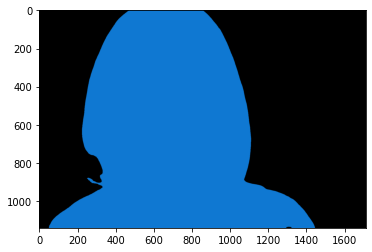

In [ ]:
from PIL import Image
from torchvision import transforms
import time

import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


start_time = time.time()
#input_image = Image.open(filename)
input_image = Image.open(filename).convert('RGB')
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)
print("--- %s seconds ---" % (time.time() - start_time))

# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)


plt.imshow(r)


# load the image
image = cv2.imread(filename)
r_pix = np.array(r)
print(r_pix.shape)
input_image_pix2 = np.zeros((r_pix.shape[0],r_pix.shape[1],4))
for x in range(len(r_pix)):
  for y in range(len(r_pix[0])):
    if (r_pix[x][y]==15):
      input_image_pix2[x][y][0]=image[x][y][0]
      input_image_pix2[x][y][1]=image[x][y][1]
      input_image_pix2[x][y][2]=image[x][y][2]
      input_image_pix2[x][y][3]=255
    else:
      input_image_pix2[x][y][3]=0

cv2.imwrite(new_name, input_image_pix2)

## GluonCV Template

In [ ]:
!pip install mxnet gluoncv

     |████████████████████████████████| 55.0MB 53kB/s 
     |████████████████████████████████| 819kB 54.2MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
import os
os.getcwd()
#os.chdir('/content/gdrive/My Drive/FYP')

'/content/gdrive/My Drive/FYP'

In [ ]:
os.listdir("original face")

['girl.jpg',
 'girl2.jpeg',
 'girl3.jpeg',
 'girl5.jpeg',
 'girl5.jpg',
 'girl6.jpg',
 'girl7.jpg',
 'girl8.jpg',
 'girl9.jpg',
 'girl10.jpg',
 'girl12.jpeg',
 'girl13.jpg',
 'girl14.jpg',
 'girl15.jpg',
 'girl16.jpg',
 'girl17.jpg',
 'girl18.jpg',
 'girl20.jpg',
 'girl4.jpg',
 'girl21.jpg',
 'girl22.png',
 'girl23.jpg',
 'girl25.jpg',
 'girl26.jpg',
 'girl27.jpg',
 'girl19.jpg',
 'girl19_.jpg',
 'girl_1.jpg',
 'girl_2.jpg',
 'girl_3.jpg',
 'girl_3.png',
 'A7.jpg',
 'image']

In [ ]:
filename="original face/girl17.jpg"
new_name = "segmented face/gluoncv/segmentedgirl17.png"

(1140, 1711, 3)


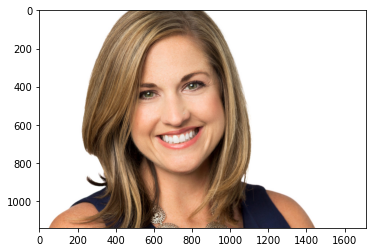

INFO:root:Model file not found. Downloading.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): apache-mxnet.s3-accelerate.dualstack.amazonaws.com:443


DEBUG:urllib3.connectionpool:https://apache-mxnet.s3-accelerate.dualstack.amazonaws.com:443 "GET /gluon/models/resnet101_v1s-bd93a83c.zip HTTP/1.1" 200 102522959
100121KB [00:03, 26877.03KB/s]                           
INFO:root:Model file not found. Downloading.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): apache-mxnet.s3-accelerate.dualstack.amazonaws.com:443


DEBUG:urllib3.connectionpool:https://apache-mxnet.s3-accelerate.dualstack.amazonaws.com:443 "GET /gluon/models/fcn_resnet101_voc-12c2b9b3.zip HTTP/1.1" 200 202068262
197333KB [00:06, 31500.07KB/s]                            


--- 69.14727997779846 seconds ---


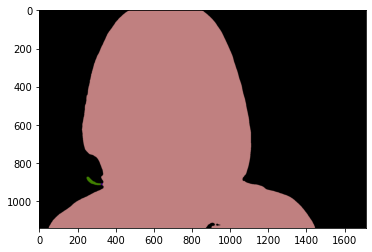

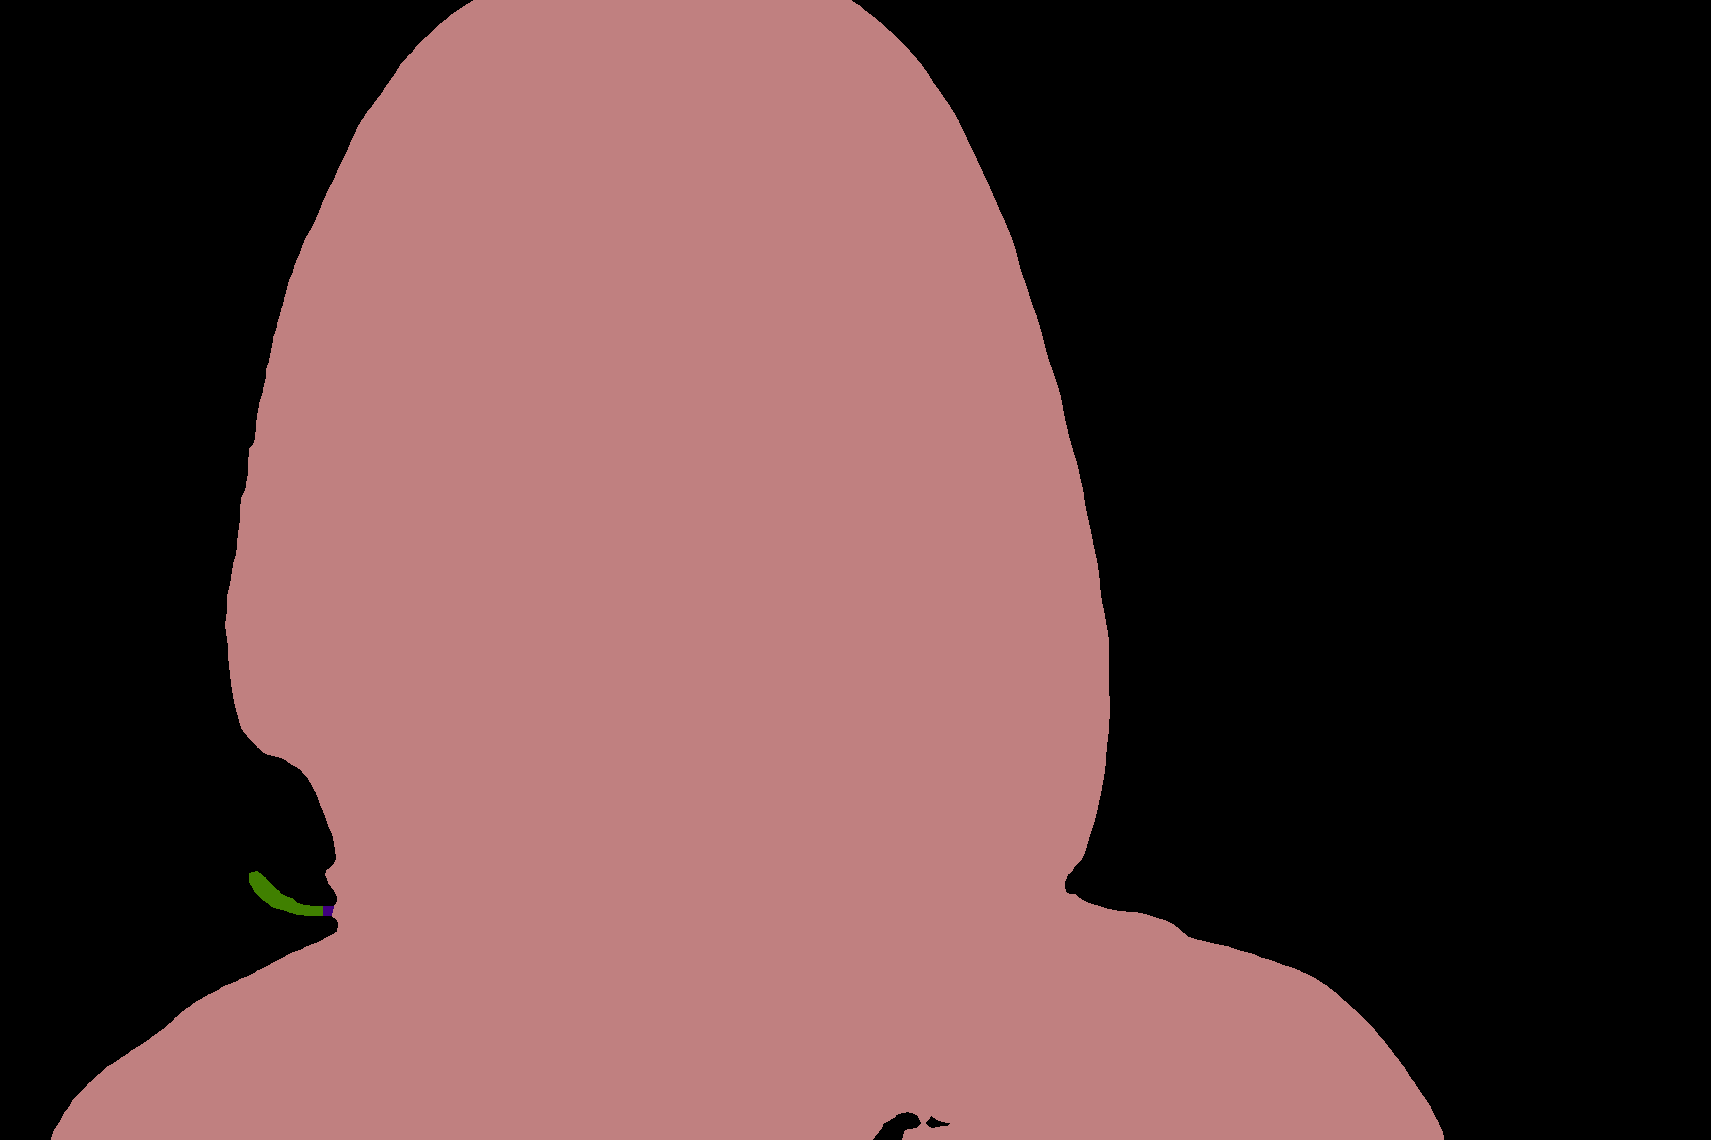

(1140, 1711, 3)


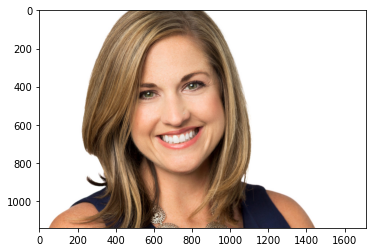

_____Done______


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt
from gluoncv.data.transforms.presets.segmentation import test_transform
import time
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)

#cv2_imshow(cv2.imread(filename))

img = image.imread(filename)
print(img.shape)
plt.imshow(img.asnumpy())
plt.show()
img = test_transform(img, ctx)

start_time = time.time()
model = gluoncv.model_zoo.get_model('fcn_resnet101_voc', pretrained=True)

output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
print("--- %s seconds ---" % (time.time() - start_time))

mask = get_color_pallete(predict, 'pascal_voc')
mask.save('output2.png')

mmask = mpimg.imread('output2.png')
plt.imshow(mmask)
plt.show()

cv2_imshow(cv2.imread('output2.png'))

img = image.imread(filename)
print(img.shape)

plt.imshow(img.asnumpy())
plt.show()


# load the image
image = cv2.imread(filename)

image2 = np.zeros((img.shape[0],img.shape[1],4))
for x in range(len(predict)):
  for y in range(len(predict[0])):
    if (predict[x][y]==15):
      image2[x][y][0]=image[x][y][0]
      image2[x][y][1]=image[x][y][1]
      image2[x][y][2]=image[x][y][2]
      image2[x][y][3]=255
    else:
      image2[x][y][3]=0

cv2.imwrite(new_name, image2)
print("_____Done______")

In [ ]:
os.path.dirname("face_makeup_PyTorch/test.py")

'face_makeup_PyTorch'

## segment out makeup

In [ ]:
os.chdir("face_makeup_PyTorch")

In [ ]:
import torch
import os
from model import BiSeNet
import os.path as osp
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2


def vis_parsing_maps(im, parsing_anno, stride, save_im=False, save_path='vis_results/parsing_map_on_im.jpg'):
    # Colors for all 20 parts
    part_colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0],
                   [255, 0, 85], [255, 0, 170],
                   [0, 255, 0], [85, 255, 0], [170, 255, 0],
                   [0, 255, 85], [0, 255, 170],
                   [0, 0, 255], [85, 0, 255], [170, 0, 255],
                   [0, 85, 255], [0, 170, 255],
                   [255, 255, 0], [255, 255, 85], [255, 255, 170],
                   [255, 0, 255], [255, 85, 255], [255, 170, 255],
                   [0, 255, 255], [85, 255, 255], [170, 255, 255]]

    im = np.array(im)
    vis_im = im.copy().astype(np.uint8)
    vis_parsing_anno = parsing_anno.copy().astype(np.uint8)
    vis_parsing_anno = cv2.resize(vis_parsing_anno, None, fx=stride, fy=stride, interpolation=cv2.INTER_NEAREST)
    vis_parsing_anno_color = np.zeros((vis_parsing_anno.shape[0], vis_parsing_anno.shape[1], 3)) + 255

    num_of_class = np.max(vis_parsing_anno)

    for pi in range(1, num_of_class + 1):
        index = np.where(vis_parsing_anno == pi)
        vis_parsing_anno_color[index[0], index[1], :] = part_colors[pi]

    vis_parsing_anno_color = vis_parsing_anno_color.astype(np.uint8)
    # print(vis_parsing_anno_color.shape, vis_im.shape)
    vis_im = cv2.addWeighted(cv2.cvtColor(vis_im, cv2.COLOR_RGB2BGR), 0.4, vis_parsing_anno_color, 0.6, 0)

    # Save result or not
    if save_im:
        cv2.imwrite(save_path[:-4] +'.png', vis_parsing_anno)
        cv2.imwrite(save_path, vis_im, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    return vis_parsing_anno
    # return vis_im


def evaluate(image_path='./imgs/116.jpg', cp='cp/79999_iter.pth'):

    # if not os.path.exists(respth):
    #     os.makedirs(respth)

    n_classes = 19
    net = BiSeNet(n_classes=n_classes)
    net.cuda()
    net.load_state_dict(torch.load(cp))
    net.eval()

    to_tensor = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

    with torch.no_grad():
        img = Image.open(image_path).convert('RGB')
        #image = img.resize((512, 512), Image.BILINEAR)
        image = img
        img = to_tensor(image)
        img = torch.unsqueeze(img, 0)
        img = img.cuda()
        out = net(img)[0]
        parsing = out.squeeze(0).cpu().numpy().argmax(0)
        # print(parsing)
        # print(np.unique(parsing))

        # vis_parsing_maps(image, parsing, stride=1, save_im=False, save_path=osp.join(respth, dspth))
        return parsing

In [ ]:
import cv2
import os
import numpy as np
from skimage.filters import gaussian
#from test import evaluate
import argparse
from google.colab.patches import cv2_imshow

def sharpen(img):
    img = img * 1.0
    gauss_out = gaussian(img, sigma=5, multichannel=True)

    alpha = 1.5
    img_out = (img - gauss_out) * alpha + img

    img_out = img_out / 255.0

    mask_1 = img_out < 0
    mask_2 = img_out > 1

    img_out = img_out * (1 - mask_1)
    img_out = img_out * (1 - mask_2) + mask_2
    img_out = np.clip(img_out, 0, 1)
    img_out = img_out * 255
    return np.array(img_out, dtype=np.uint8)


def hair(image, parsing, part=17, color=[230, 50, 20]):
    b, g, r = color      #[10, 50, 250]       # [10, 250, 10]
    tar_color = np.zeros_like(image)
    tar_color[:, :, 0] = b
    tar_color[:, :, 1] = g
    tar_color[:, :, 2] = r

    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    tar_hsv = cv2.cvtColor(tar_color, cv2.COLOR_BGR2HSV)

    if part == 12 or part == 13:
        image_hsv[:, :, 0:2] = tar_hsv[:, :, 0:2]
    else:
        image_hsv[:, :, 0:1] = tar_hsv[:, :, 0:1]

    changed = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

    if part == 17:
        changed = sharpen(changed)

    changed[parsing != part] = image[parsing != part]
    return changed


## HAIR TARGET

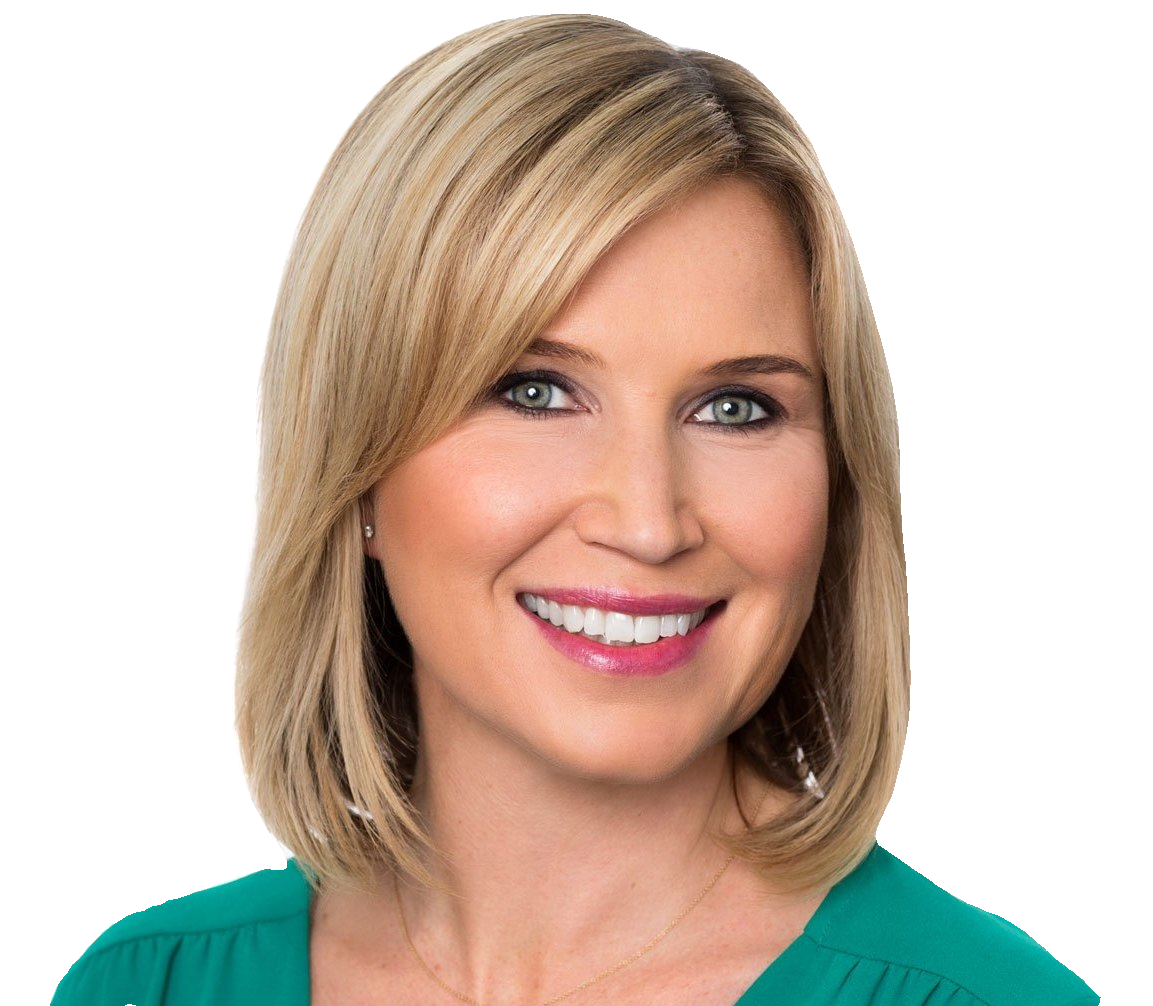

In [ ]:
from PIL import Image
# 1  face
# 11 teeth
# 12 upper lip
# 13 lower lip
# 17 hair


table = {
    'hair': 17,
    'upper_lip': 12,
    'lower_lip': 13
}


cp = 'cp/79999_iter.pth'

# image = cv2.imread(image_path)

# #image=data
image_path="../segmented face/gluoncv/segmentedgirl19.png"
image = Image.open(image_path)
# convert image to numpy array
og_image = np.array(image)
image

--- 0.6828701496124268 seconds ---
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


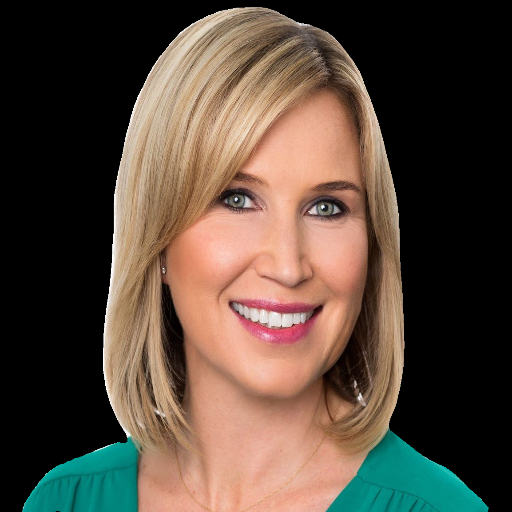

In [ ]:
import time


ori = og_image.copy()
start_time = time.time()
parsing = evaluate(image_path, cp)
print("--- %s seconds ---" % (time.time() - start_time))

print(parsing)
colors = [[230, 50, 20], [20, 70, 180], [20, 70, 180]]

cv2_imshow(cv2.resize(cv2.cvtColor(og_image, cv2.COLOR_BGR2RGB), (512, 512)))

In [ ]:
hair_target = og_image

In [ ]:
hair_target = np.zeros((og_image.shape[0],og_image.shape[1],4))

In [ ]:
og_image.shape

(1006, 1153, 4)

In [ ]:
hair_target.shape

(1006, 1153, 4)

In [ ]:
parsing.shape

(1006, 1153)

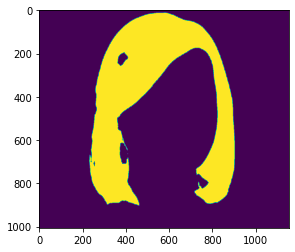

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(parsing==17)

In [ ]:
for x in range(len(parsing)):
  for y in range(len(parsing[0])):
    if (parsing[x][y]==17):
      hair_target[x][y][0]=og_image[x][y][0]
      hair_target[x][y][1]=og_image[x][y][1]
      hair_target[x][y][2]=og_image[x][y][2]
      hair_target[x][y][3]=255
    else:
      hair_target[x][y][3]=0

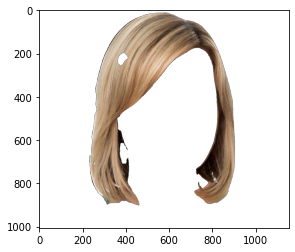

In [ ]:
plt.imshow(hair_target/255)

## HAIR SOURCE

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 8192


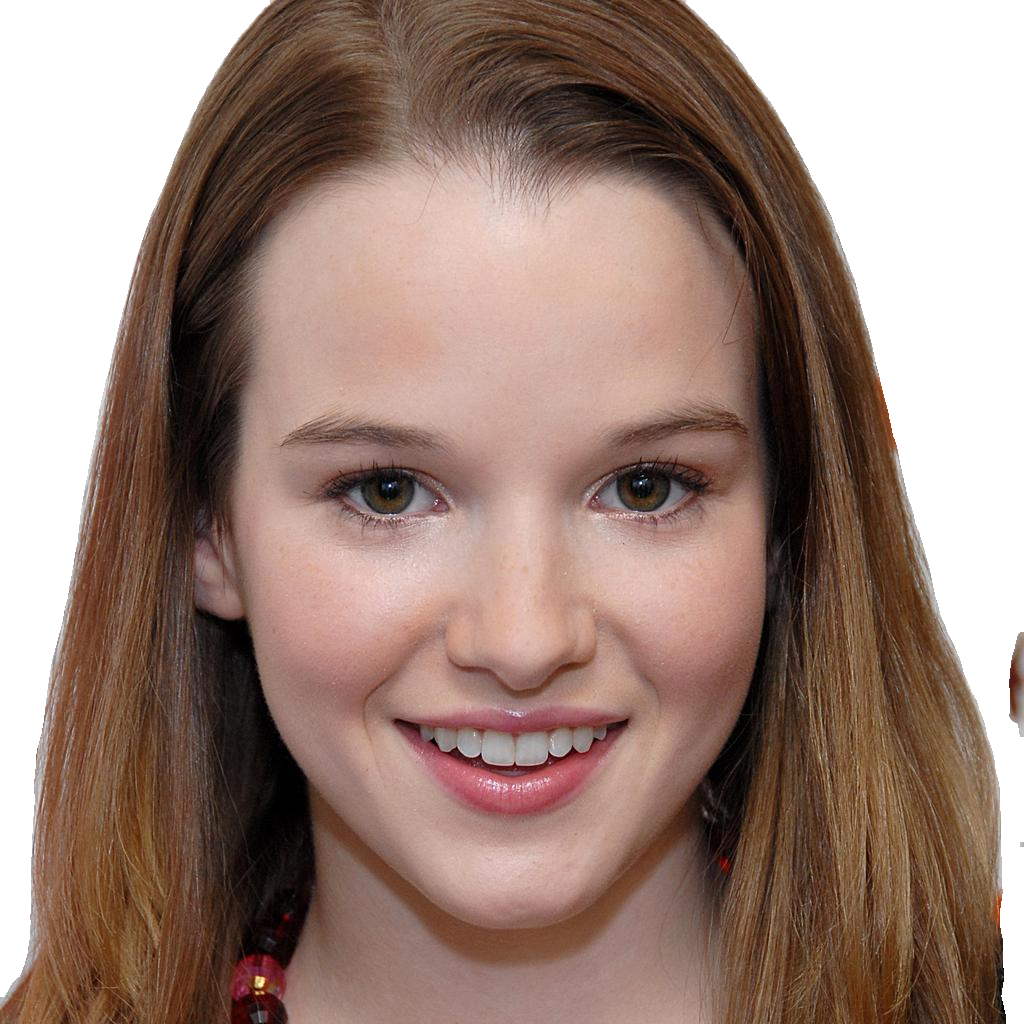

In [ ]:
from PIL import Image
# 1  face
# 11 teeth
# 12 upper lip
# 13 lower lip
# 17 hair


table = {
    'hair': 17,
    'upper_lip': 12,
    'lower_lip': 13
}


cp = 'cp/79999_iter.pth'

# image = cv2.imread(image_path)

# #image=data
# image_path="../segmented face/segmentedgirl5.png"
image_path="../segmented face/pytorch/segmentedgirl.png"

image = Image.open(image_path)
# convert image to numpy array
og_image = np.array(image)
image

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 41 8192


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [17 17 17 ...  0  0  0]
 [17 17 17 ...  0  0  0]
 [17 17 17 ...  0  0  0]]


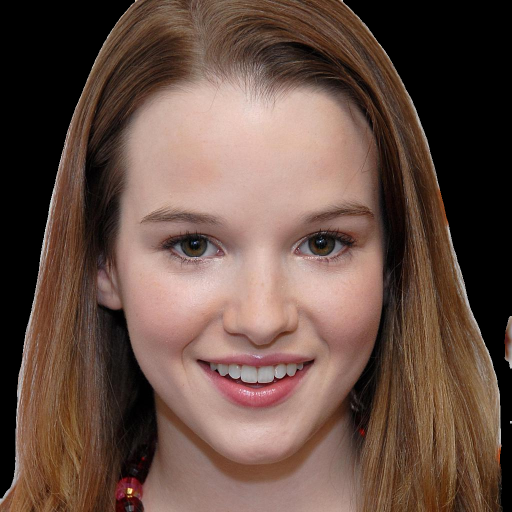

In [ ]:
ori = og_image.copy()
parsing = evaluate(image_path, cp)

print(parsing)
colors = [[230, 50, 20], [20, 70, 180], [20, 70, 180]]
cv2_imshow(cv2.resize(cv2.cvtColor(og_image, cv2.COLOR_BGR2RGB), (512, 512)))

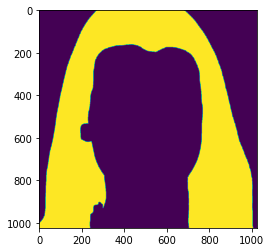

In [ ]:
plt.imshow(parsing==17)

In [ ]:
hair_source = og_image

In [ ]:
hair_source = np.zeros((og_image.shape[0],og_image.shape[1],4))

In [ ]:
for x in range((hair_source.shape[0])):
  for y in range((hair_source.shape[1])):
    if (parsing[x][y]==17):
      hair_source[x][y][0]=og_image[x][y][0]
      hair_source[x][y][1]=og_image[x][y][1]
      hair_source[x][y][2]=og_image[x][y][2]
      hair_source[x][y][3]=255
    else:
      hair_source[x][y][3]=0

In [ ]:
hair_source.shape

(1024, 1024, 4)

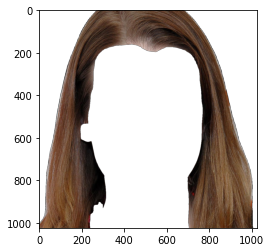

In [ ]:
plt.imshow(hair_source/255)

# Color HAIR

In [ ]:
%matplotlib inline

import sys
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

from collections import OrderedDict
from itertools import combinations
from IPython.core.debugger import set_trace

logging.basicConfig(level=logging.DEBUG)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [ ]:
def colour_transfer_IDT(I0=None,I1=None,nb_iterations=None,*args,**kwargs):
    #varargin = colour_transfer_IDT.varargin
    #nargin = colour_transfer_IDT.nargin

    if (I0.ndim != 3):
        error('pictures must have 3 dimensions')
    
    nb_channels=np.shape(I0)[2]
# colour_transfer_IDT.m:23
    ## reshape images as 3xN matrices

    D0 = np.zeros((3, np.dot(len(I0),len(I0[0]))))
    D1 = np.zeros((3, np.dot(len(I1),len(I1[0]))))
    for i in range(0,3):
        print("here")

        D0[i,:]=np.reshape(I0[:,:,i],np.dot(len(I0),len(I0[0])), order="F")
# colour_transfer_IDT.m:27
        D1[i,:]=np.reshape(I1[:,:,i],np.dot(len(I1),len(I1[0])), order="F")
# colour_transfer_IDT.m:28
    
    ## building a sequence of (almost) random projections
#
    R = np.zeros((nb_iterations,6,3))
    R[0]=np.array([[1,0,0],[0,1,0],[0,0,1],[2 / 3,2 / 3,- 1 / 3],[2 / 3,- 1 / 3,2 / 3],[- 1 / 3,2 / 3,2 / 3]])
    # colour_transfer_IDT.m:34
    for i in range(1,nb_iterations):
        R[i]=np.dot(R[0],sp.linalg.orth(np.random.randn(3,3)))

    DR=pdf_transfer(D0,D1,R)
# colour_transfer_IDT.m:41
    ## reshape the resulting 3xN matrix as an image
    IR=I0.copy()
# colour_transfer_IDT.m:44
    for i in range(0,3):
        IR[:,:,i]=np.reshape(DR[i,:],(len(IR),len(IR[0])), order="F")

    return IR

In [ ]:

def pdf_transfer(D0=None,D1=None,Rotations=None,*args,**kwargs):
    prompt=''
    eps = 1e-6
# pdf_transfer.m:34
    for it in range(0,nb_iterations):
# pdf_transfer.m:38
        #fprintf(prompt)
        R=Rotations[it]
# pdf_transfer.m:41
        print("it.    " ,it)
        nb_projs=len(R)
# pdf_transfer.m:42
        
        D0R=np.dot(R,D0)
# pdf_transfer.m:46
        D1R=np.dot(R,D1)
# pdf_transfer.m:47
        D0R_=np.zeros(D0R.shape)

        
# pdf_transfer.m:48
        for i in range(0,nb_projs):
            # if(i==3):
            #   break;
            # get the data range
            print("i         ",i)

            datamin=min(np.concatenate((D0R[i,:],D1R[i,:]))) - eps
# pdf_transfer.m:53
            datamax=max(np.concatenate((D0R[i,:],D1R[i,:]))) + eps
# pdf_transfer.m:54
            # u=np.arange(1,(301)) / (301)*(datamax - datamin) + datamin
            # u_edge=np.arange(1,(301)) / (301)*(datamax - datamin)
            print("datamax ", datamax)
            print("datamin ", datamin)
            u=(np.arange(0,(300))/(300-1))*(datamax - datamin) + datamin
            u_edge=(np.arange(-0.5,300.5,1)/(300.5-1))*(datamax - datamin)+ datamin
            print("max u_edge ", max(u_edge))
            print("min u_edge ", min(u_edge))
            print("max u ", max(u))
            print("min u ", min(u))
# pdf_transfer.m:55
            p0R,bins1,patches=plt.hist(D0R[i,:],bins = u_edge)
            print("is my bin edge same as u_edge?",u_edge == bins1)
            print("_before  pdf_transfer1D_")
# pdf_transfer.m:58
            #p1R=plt.hist(D1R[i,:],u)
            p1R,bins2,patches2=plt.hist(D1R[i,:],bins = u_edge)
# pdf_transfer.m:59
            f=pdf_transfer1D(p0R,p1R,bins1.size,bins2.size)
# pdf_transfer.m:62
            #u=np.arange(0,(300)) / (300)*(datamax - datamin) + datamin
            
            newfun = sp.interpolate.interp1d(x = u, y = f.T,kind='linear')
            
            # print("I DID IT")
            x= D0R[i,:]
            print("max x ", max(x))
            print("min x ", min(x))
            print(" after interp1d")
            newy  = newfun(x)
            D0R_[i,:]=( newy - 1) /(300-1)*(datamax-datamin) + datamin;
            # D0R_[i,:]=np.interp(D0R[i,:],edges[1:],f.T)/(300-1)*(datamax-datamin) + datamin;
            # print("))))")
            # D0R_[i,:]=np.dot((interp1(u,f.T,D0R[i,:]) - 1) / (300 - 1),(datamax - datamin)) + datamin
# pdf_transfer.m:65
        # print("DO ",D0.shape)
        # print("D0R_ ", D0R_.shape)
        # print("D0R ", D0R_.shape)
        # print("R ",R.shape)
        lin, residuals, rank, s = np.linalg.lstsq(R,(D0R_ - D0R))
        print("lin", lin.shape)
        D0=relaxation * lin + D0
# pdf_transfer.m:68
    
    
    DR=D0.copy()
# pdf_transfer.m:74
    return DR
    

    
    # 1D - PDF Transfer
    
def pdf_transfer1D(pX=None,pY=None,bins=None,bins2=None,*args,**kwargs):
    #varargin = pdf_transfer1D.varargin
    #nargin = pdf_transfer1D.nargin
    print("in pdf_transfer1D")
    nbins=bins
    #print(pX)
# pdf_transfer.m:82
    eps=[1e-06]
    x = pX+eps
    PX=x.cumsum()
# pdf_transfer.m:86
    PX=PX / PX[-1]
# pdf_transfer.m:87
    y = pY + eps
    PY=y.cumsum()
# pdf_transfer.m:89
    PY=PY / PY[-1]
    print("PX min ", min(PX))
    print("PX max ", max(PX))

    print("PY min ", min(PY))
    print("PY max ", max(PY))

    f=sp.interpolate.interp1d(x = PY, y=np.arange(0,nbins-1),kind='linear',fill_value="extrapolate")
    b=f(PX)
    print(b.size)
    #f=interp1(PY,np.arange(0,nbins - 1),PX,'linear')
# pdf_transfer.m:94
    b[PX <= PY[0]]=0
# pdf_transfer.m:95
    b[PX >= PY[-1]]=nbins - 1
# pdf_transfer.m:96
    if sum(np.isnan(b)) > 0:
        error('colour_transfer:pdf_transfer:NaN','pdf_transfer has generated NaN values')
    print("out pdf_transfer1D")
    
    return b
    


In [ ]:
# I1 = plt.imread('purplehair.jpeg')/255
# #I1 = plt.imread('hair.jpg')/255
I1 = hair_target/255
I0 = hair_source/255
# I1 = hair_source
# I0 = hair_target
relaxation=1
nb_iterations=10

57.20053839683533 seconds 
129.43599557876587  142.48027396202087  
135.465101480484
  135.27579832077026
   68.40378212928772  - 63.351608991622925   81.15344738960266
     62.166435956954956   
     57.96973562240  
     120.39966821670532


pytorch

137.8142294883728+129.3288054466247+140.95117783546448+119.71184277534+139.26626+115.822233+58.797861337661+69.5785679817199+62.08360242843628+79.84538483619+  65.4041049480

here
here
here
it.     0
i          0
datamax  1.000001
datamin  -1e-06
max u_edge  1.000001
min u_edge  -0.0016704524207011684
max u  1.000001
min u  -1e-06
is my bin edge same as u_edge? [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:72: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


lin (3, 1048576)
it.     1
i          0
datamax  0.8507761872357031
datamin  -0.1548039040427679
max u_edge  0.8507761872357033
min u_edge  -0.15648266880283213
max u  0.8507761872357033
min u  -0.1548039040427679
is my bin edge same as u_edge? [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True 

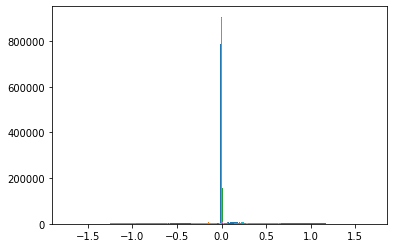

In [ ]:
import time
start_time = time.time()
IR_idt=colour_transfer_IDT(I0,I1,10)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.05217576026916504 seconds ---


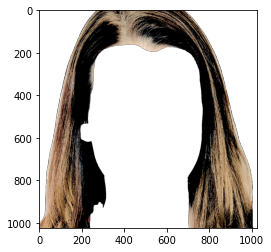

In [ ]:
import time
start_time = time.time()
plt.imshow(IR_idt)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
IR_idt.shape

(1024, 1024, 4)

In [ ]:
image_path="../segmented face/pytorch/segmentedgirl.png"

In [ ]:
cp2= IR_idt

In [ ]:
type(cp2[0][0][0])

numpy.float64

In [ ]:
og = np.asarray(plt.imread(image_path),dtype=np.float64)

In [ ]:
og[3]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

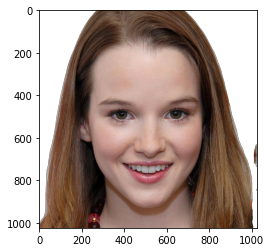

In [ ]:
plt.imshow(og)

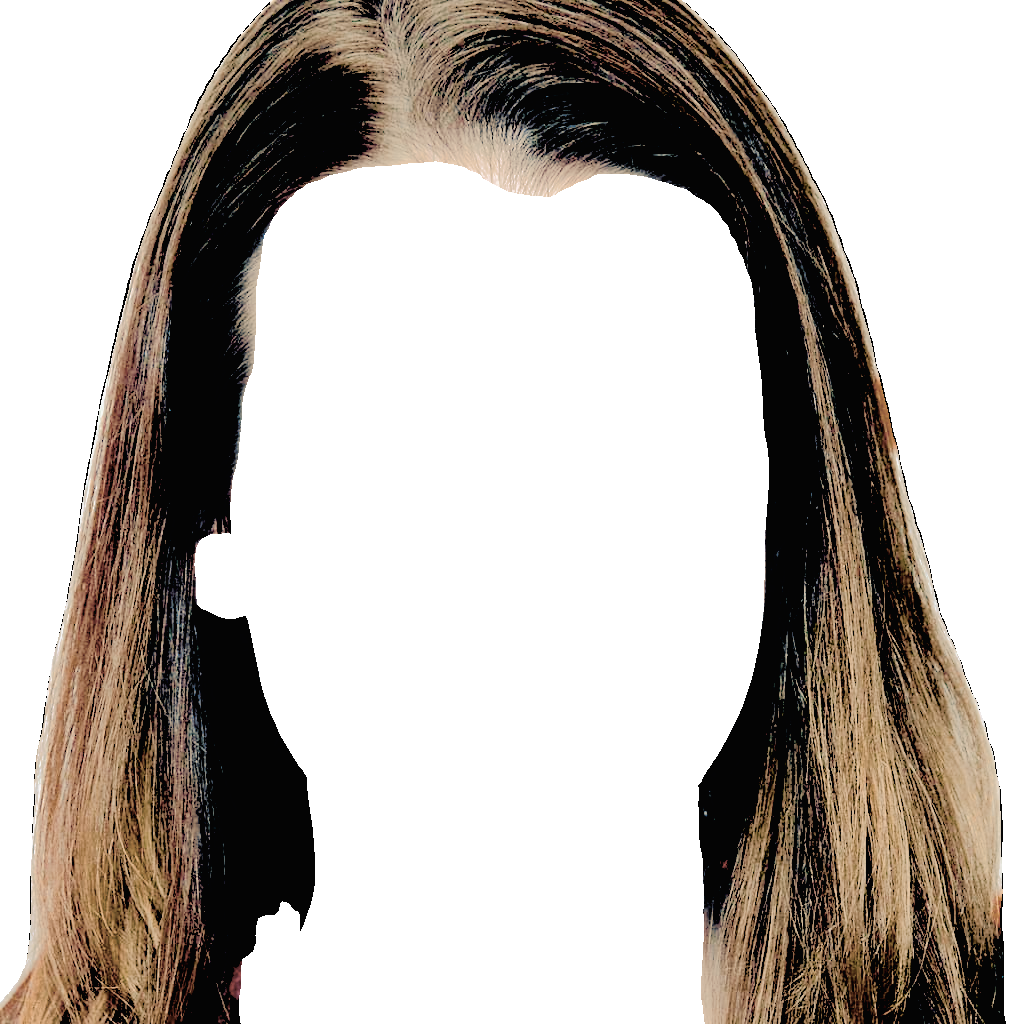

In [ ]:
from skimage import img_as_ubyte

img2 = img_as_ubyte(cp2/np.max(cp2))
Image.fromarray(img2)

In [ ]:
from PIL import Image
import numpy as np
# load the image
#image = cv2.imread(image_path)

og2 = og
cp2= IR_idt
for x in range(IR_idt.shape[0]):
  for y in range(IR_idt.shape[1]):
    if (cp2[x,y,3]==1.0):
      og2[x,y,0]=cp2[x,y,0]
      og2[x,y,1]=cp2[x,y,1]
      og2[x,y,2]=cp2[x,y,2]
      og2[x,y,3]=1
      # new[x][y][3]=255

In [ ]:
np.max(og2)

1.0208081312995259

In [ ]:
from skimage import img_as_ubyte

img = img_as_ubyte(og2/np.max(og2))

In [ ]:
#HAIR
img2 = Image.fromarray(img)

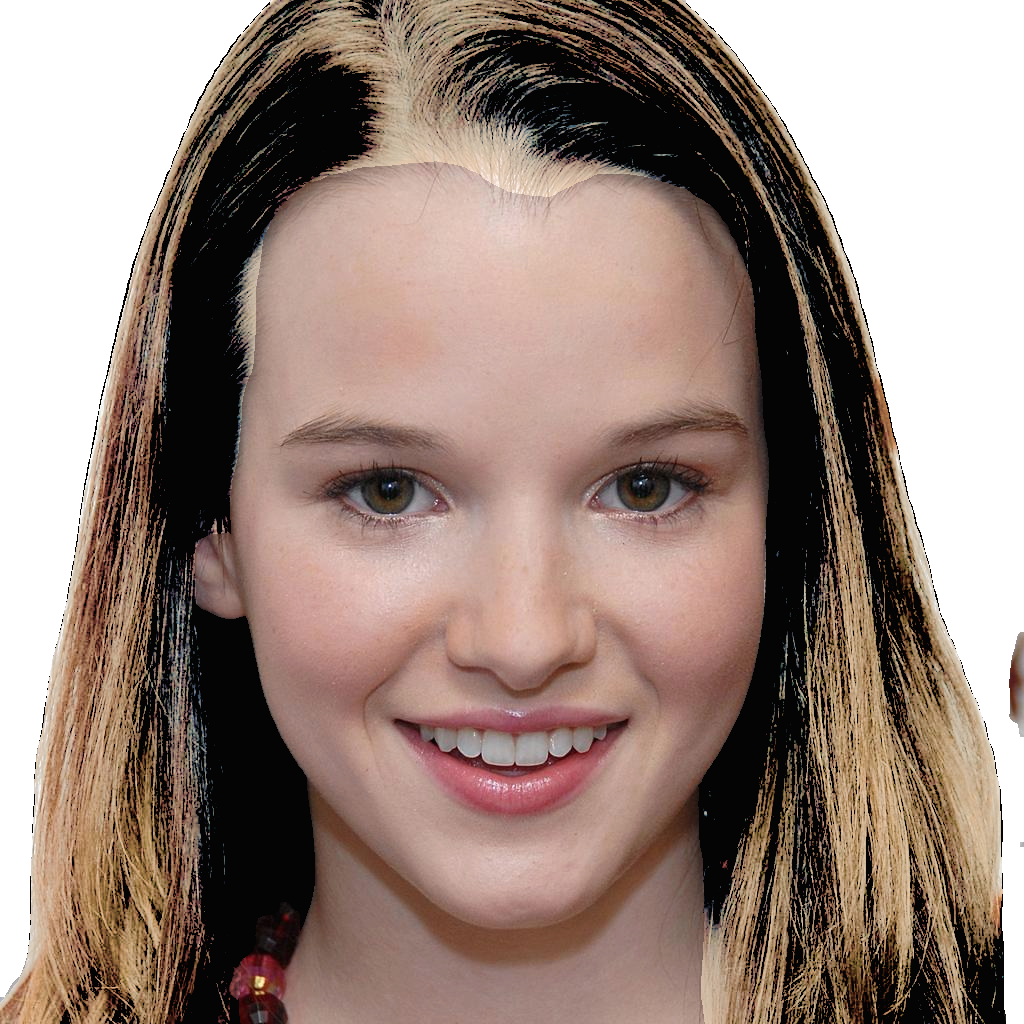

In [ ]:
img2

In [ ]:
img2.save("../result/result_hair_gluoncv/girl19_girl_result.png")

In [ ]:
img2.save("../result/result_hair_gluoncv/A7_girl_result.png")

In [ ]:
img2.save("../result/result_hair_gluoncv/girl26_girl_result.png")

In [ ]:
# img2.save("../result/13_girl_result.jpg")

In [ ]:
img2.save("../result/result_hair_gluoncv/9_girl_result.png") 

In [ ]:
img2.save("../result/result_hair_gluoncv/17_girl_result.png")

In [ ]:
img2.save("../result/result_hair_gluoncv/12_girl_result.png")

In [ ]:
img2.save("../result/result_hair_gluoncv/16_6_result.png")

In [ ]:
img2.save("../result/result_hair_gluoncv/girl17_6_result.png") #don't do again

In [ ]:
img2.save("../result/result_hair_gluoncv/girl_2_6_result.png") #---

In [ ]:
img2.save("../result/result_hair_gluoncv/12_6_result.png")  #don't do again

In [ ]:
img2.save("../result/result_hair_gluoncv/17_6_result.png")  #don't do again

In [ ]:
img2.save("../result/result_hair_gluoncv/1_6_result.png") # dont do

In [ ]:
img2.save("../result/result_hair_gluoncv/8_6_result.png") #don't do

In [ ]:
img2.save("../result/result_hair_pytorch/girl19_girl_result.png")

In [ ]:
img2.save("../result/result_hair_pytorch/A7_girl_result.png")

In [ ]:
img2.save("../result/result_hair_pytorch/girl26_girl_result.png")

In [ ]:
# img2.save("../result/13_girl_result.jpg")

In [ ]:
img2.save("../result/result_hair_pytorch/9_girl_result.png") 

In [ ]:
img2.save("../result/result_hair_pytorch/17_girl_result.png")

In [ ]:
img2.save("../result/result_hair_pytorch/12_girl_result.png")

In [ ]:
img2.save("../result/result_hair_pytorch/16_6_result.png")

In [ ]:
img2.save("../result/result_hair_pytorch/girl17_6_result.png") #don't do again

In [ ]:
img2.save("../result/result_hair_pytorch/girl_2_6_result.png") #---

In [ ]:
 img2.save("../result/result_hair_pytorch/12_6_result.png")  #don't do again

In [ ]:
img2.save("../result/result_hair_pytorch/17_6_result.png")  #don't do again

In [ ]:
img2.save("../result/result_hair_pytorch/1_6_result.png") # dont do

In [ ]:
img2.save("../result/result_hair_pytorch/8_6_result.png") #don't do